In [1]:
from spectacle.core.spectra import Spectrum1D
from spectacle.process.lsf import LSF
from spectacle.analysis.metrics import correlate, npcorrelate, cross_correlate, autocorrelate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 8]

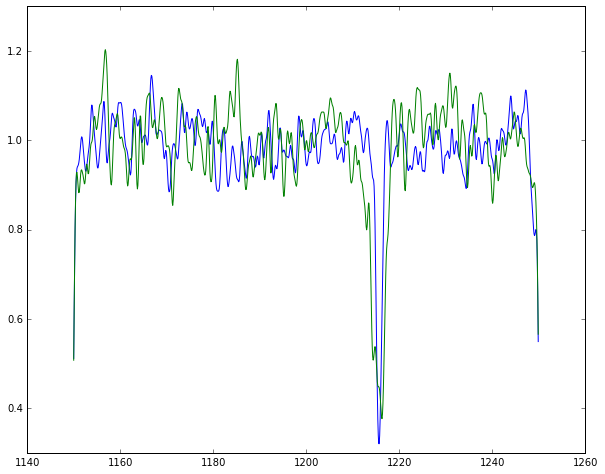

In [3]:
disp = np.arange(1150, 1250, 0.1)

spectrum1 = Spectrum1D(dispersion=disp, uncertainty=np.random.sample(1000) * 0.005)
spectrum1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=1e7, column_density=10**14.66, name="Halpha")
spectrum1.add_noise()
cos_lsf = LSF(instrument='cos')
spectrum1.add_lsf(cos_lsf)

spectrum2 = Spectrum1D(dispersion=disp, uncertainty=np.random.sample(1000) * 0.0075)
spectrum2.add_line(lambda_0=1.21567010E+03, f_value=0.4164, v_doppler=4e7, column_density=10**14.7, name="Halpha")
spectrum2.add_noise(std_dev=0.25)
cos_lsf = LSF(instrument='cos')
spectrum2.add_lsf(cos_lsf)

# mask = (spectrum1.dispersion > 1150) & (spectrum1.dispersion < 1250)
plt.plot(spectrum1.dispersion, spectrum1.flux)
plt.plot(spectrum2.dispersion, spectrum2.flux)
plt.show()

## Peeples Correlation

### Full

Sum: 5.692+/-0.028


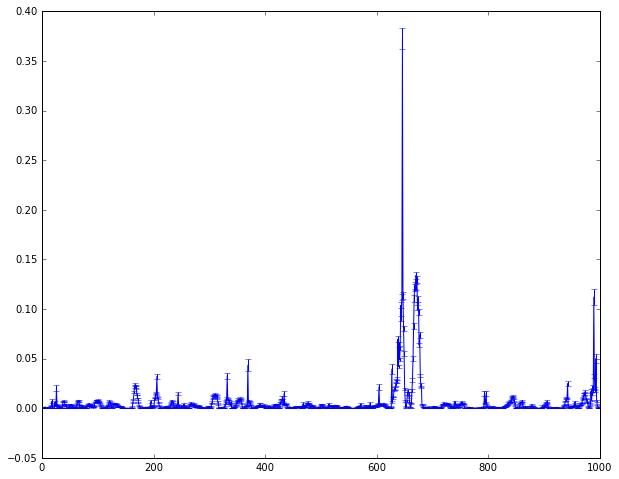

In [4]:
vals, uncerts = correlate(spectrum1, spectrum2)

import uncertainties.unumpy as unp
print("Sum: {}".format(unp.uarray(vals, uncerts).sum()))

plt.errorbar(range(len(vals)), vals, yerr=uncerts)
plt.show()

### Lite

Sum: 1037.15+/-0.24


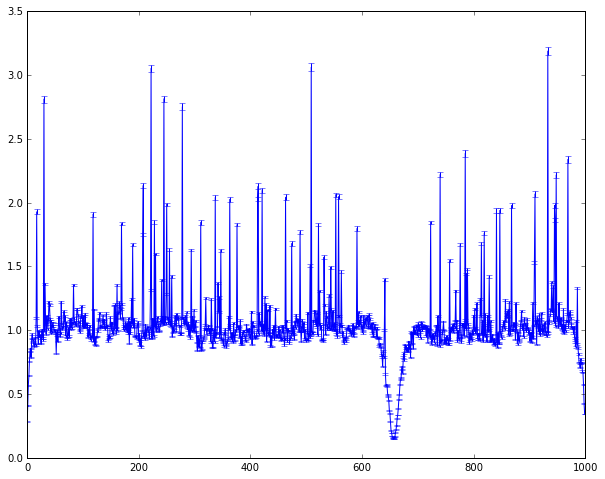

In [5]:
vals, uncerts = correlate(spectrum1, spectrum2, mode='lite')

print("Sum: {}".format(unp.uarray(vals, uncerts).sum()))

plt.errorbar(range(len(vals)), vals, yerr=uncerts)
plt.show()

## Numpy Correlate

In [6]:
val, uncert = npcorrelate(spectrum1, spectrum2)

print(unp.unarray(val, uncert))

[ 961.99326731] +/- [ 0.14104687]


## Peeples Autocorrelate

In [8]:
res1 = autocorrelate(spectrum1)
res2 = autocorrelate(spectrum2)

print("Spectrum1: {}".format(unp.uarray(*res1)))
print("Spectrum2: {}".format(unp.uarray(*res2)))

Spectrum1: 0.00103989+/-0.00000017
Spectrum2: 0.00103579+/-0.00000025


/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/Users/nearl/anaconda3/envs/spec_env/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
